# Comparación de perfiles de Pozo desde archivos LAS

**Created by:** Rubens Merlino

**Based on works of:** Andy McDonald  


## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
lasio is a library that has been developed to handle and work with LAS files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

%matplotlib inline 
#%matplotlib qt 

To load our file in, we can use the read() method from LASIO like so:

In [94]:
#pozo Yacaré
lasYacRes = lasio.read("FCIEN/NO_08_Y_X1 - YACARE/NO_08_Y_X1 - Induction-SFL.las")
lasYacCali = lasio.read("FCIEN/NO_08_Y_X1 - YACARE/NO_08_Y_X1 - Lithodensity-GR.las")
lasYacSPGR = lasio.read("FCIEN/NO_08_Y_X1 - YACARE/NO_08_Y_X1 - DT-GR.las")

#pozo Itacumbú
lasItaRes = lasio.read("FCIEN/NO_10_I_X1 - ITACUMBU/NO_10_I_X1 - Induction.las")
lasItaCali = lasio.read("FCIEN/NO_10_I_X1 - ITACUMBU/NO_10_I_X1 - DT.las")
lasItaSPGR = lasio.read("FCIEN/NO_10_I_X1 - ITACUMBU/NO_10_I_X1 - Induction-SFL.las")

#pozo Belén
lasBel = lasio.read("FCIEN/NO_09_B_X1 - BELEN/NO_09_B_X1 - Logs.las")

#pozo Pelado
lasPel = lasio.read("FCIEN/NO_07_P_X1 - PELADO/NO_07_P_X1 - Logs.las")

## Creamos un Pandas DataFrame desde del LAS
Data loaded in using LASIO can be converted to a pandas dataframe using the .df() function. This allows us to easily plot data and pass it into one of the many machine learning algorithms.

In [95]:
wellYacRes = lasYacRes.df()
wellYacCali = lasYacCali.df()
wellYacSPGR = lasYacSPGR.df()

wellItaRes = lasItaRes.df()
wellItaCali = lasItaCali.df()
wellItaSPGR = lasItaSPGR.df()

wellBel = lasBel.df()
wellBel.reset_index(drop=True, inplace=True)
wellBel.set_index(['DEPT:2'], inplace=True)

wellPel = lasPel.df()
wellPel.reset_index(drop=True, inplace=True)
wellPel.set_index(['DEPT:2'], inplace=True)


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

## Comenzamos a visualizar los datos

Procedemos a quitar valores outliers para mejorar la observación de datos

In [96]:
#Quitamos valores 0 que estropean el ploteo

wellBel = wellBel.drop(wellBel[wellBel['CALI']<0].index)
wellBel = wellBel.drop(wellBel[wellBel['GR']==0].index)
wellBel = wellBel.drop(wellBel[wellBel['SP']==0].index)
wellBel = wellBel.drop(wellBel[wellBel['ILD']==0].index)
wellBel = wellBel.drop(wellBel[wellBel['ILD']<0].index)
wellBel = wellBel.drop(wellBel[wellBel['ILM']==0].index)


### Emparejamos al tope de Buena Vista

- Yacaré: -900
- Itacumbú: -1000
- Belén: -1025
- Pelado: -770

In [97]:
wellYacRes

,ILD,ILM,SFLU
DEPT,,,
430.35,NaN,NaN,37.8062
430.40,NaN,NaN,25.8385
430.45,NaN,NaN,7.5043
430.50,NaN,NaN,0.6282
430.55,NaN,NaN,0.4443
...,...,...,...
2394.90,103.1612,NaN,NaN
2394.95,103.1605,NaN,NaN
2395.00,103.1597,NaN,NaN


In [98]:
Yac = 900
Ita = 1000
Bel = 1025
Pel = 770

#Yacaré
wellYacRes['idx'] = wellYacRes.index
wellYacRes['idx'] = wellYacRes['idx']-Yac
wellYacRes.set_index(['idx'], inplace=True)
wellYacCali['idx'] = wellYacCali.index
wellYacCali['idx'] = wellYacCali['idx']-Yac
wellYacCali.set_index(['idx'], inplace=True)
wellYacSPGR['idx'] = wellYacSPGR.index
wellYacSPGR['idx'] = wellYacSPGR['idx']-Yac
wellYacSPGR.set_index(['idx'], inplace=True)

#Itacumbú
wellItaRes['idx'] = wellItaRes.index
wellItaRes['idx'] = wellItaRes['idx']-Ita
wellItaRes.set_index(['idx'], inplace=True)
wellItaCali['idx'] = wellItaCali.index
wellItaCali['idx'] = wellItaCali['idx']-Ita
wellItaCali.set_index(['idx'], inplace=True)
wellItaSPGR['idx'] = wellItaSPGR.index
wellItaSPGR['idx'] = wellItaSPGR['idx']-Ita
wellItaSPGR.set_index(['idx'], inplace=True)

#Belén
wellBel['idx'] = wellBel.index
wellBel['idx'] = wellBel['idx']-Bel
wellBel.set_index(['idx'], inplace=True)

#Pelado
wellPel['idx'] = wellPel.index
wellPel['idx'] = wellPel['idx']-Pel
wellPel.set_index(['idx'], inplace=True)

In [99]:
wellYacRes

,ILD,ILM,SFLU
idx,,,
-469.65,NaN,NaN,37.8062
-469.60,NaN,NaN,25.8385
-469.55,NaN,NaN,7.5043
-469.50,NaN,NaN,0.6282
-469.45,NaN,NaN,0.4443
...,...,...,...
1494.90,103.1612,NaN,NaN
1494.95,103.1605,NaN,NaN
1495.00,103.1597,NaN,NaN


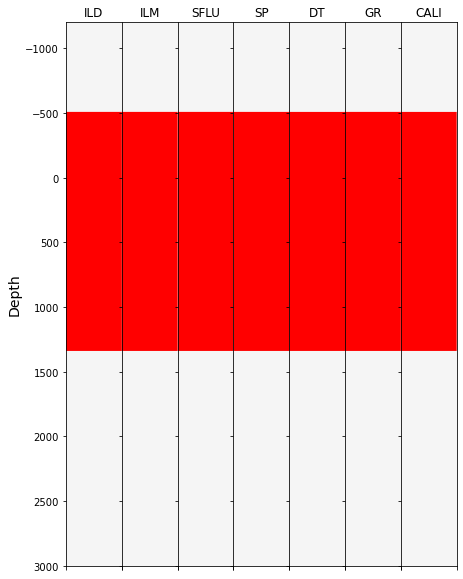

In [100]:
well_nan = wellBel.notnull() * 1
fig = plt.subplots(figsize=(7,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(3000, -1200)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

## Plotting Log Data
Finally, we can plot our data using the code below. Essentially, the code is building up a series of subplots and plotting the data on the relevant tracks.  
  
When we add curves to the tracks, we need to set the curve's properties, including the limits, colour and labels. We can also specify the shading between curves. An example has been added to the caliper curve to show shading between a bitsize value (8.5") and the CALI curve.  
  
If there are a number of features that are common between the plots, we can iterate over them using a for loop.

### Ploteo de SP y GR para los cuatro pozos

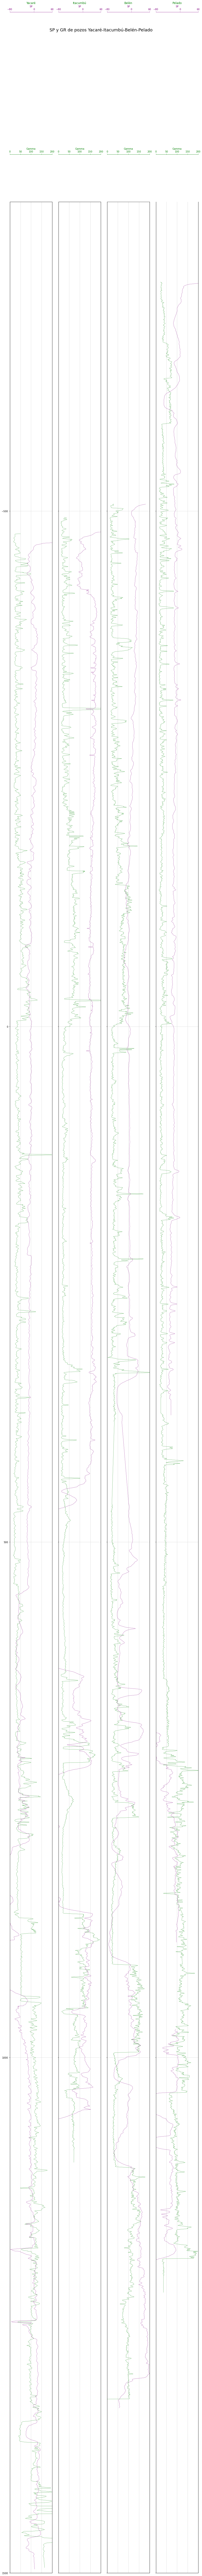

In [134]:
nombreComp = 'SP y GR de pozos Yacaré-Itacumbú-Belén-Pelado'
fig, ax = plt.subplots(figsize=(12,150))

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax5 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax7 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax2 = ax1.twiny()
ax4 = ax3.twiny()
ax6 = ax5.twiny()
ax8 = ax7.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)


# ---------------------------- POZO 1 -------------------------------
ax1.set_title('Yacaré')

# Gamma Ray track
ax1.plot(wellYacSPGR["GR"], wellYacSPGR.index, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Spontaneous Potencial
ax2.plot(wellYacSPGR["SP"], wellYacSPGR.index, color = "purple", linewidth = 0.5)
ax2.set_xlabel("SP")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.spines["top"].set_visible(True)
ax2.set_xlim(-80, 60)
ax2.xaxis.label.set_color("purple")
ax2.tick_params(axis='x', colors="purple")
ax2.spines["top"].set_edgecolor("purple")
ax2.xaxis.set_ticks_position("top")
ax2.set_xticks([-80, 0, 60])



# ---------------------------- POZO 2 -------------------------------
ax3.set_title('Itacumbú')

# Gamma Ray track
ax3.plot(wellItaSPGR["SGR"], wellItaSPGR.index, color = "green", linewidth = 0.5)
ax3.set_xlabel("Gamma")
ax3.xaxis.label.set_color("green")
ax3.set_xlim(0, 200)
ax3.tick_params(axis='x', colors="green")
ax3.spines["top"].set_edgecolor("green")
ax3.title.set_color('green')
ax3.set_xticks([0, 50, 100, 150, 200])

# Spontaneous Potencial
ax4.plot(wellItaSPGR["SP"], wellItaSPGR.index, color = "purple", linewidth = 0.5)
ax4.set_xlabel("SP")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.set_xlim(-80, 60)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.xaxis.set_ticks_position("top")
ax4.set_xticks([-80, 0, 60])



# ---------------------------- POZO 3 -------------------------------
ax5.set_title('Belén')

# Gamma Ray track
ax5.plot(wellBel["GR"], wellBel.index, color = "green", linewidth = 0.5)
ax5.set_xlabel("Gamma")
ax5.xaxis.label.set_color("green")
ax5.set_xlim(0, 200)
ax5.tick_params(axis='x', colors="green")
ax5.spines["top"].set_edgecolor("green")
ax5.title.set_color('green')
ax5.set_xticks([0, 50, 100, 150, 200])

# Spontaneous Potencial
ax6.plot(wellBel["SP"], wellBel.index, color = "purple", linewidth = 0.5)
ax6.set_xlabel("SP")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.set_xlim(-80, 60)
ax6.xaxis.label.set_color("purple")
ax6.tick_params(axis='x', colors="purple")
ax6.spines["top"].set_edgecolor("purple")
ax6.xaxis.set_ticks_position("top")
ax6.set_xticks([-80, 0, 60])




# ---------------------------- POZO 4 -------------------------------
ax7.set_title('Pelado')

# Gamma Ray track
ax7.plot(wellPel["GR"], wellPel.index, color = "green", linewidth = 0.5)
ax7.set_xlabel("Gamma")
ax7.xaxis.label.set_color("green")
ax7.set_xlim(0, 200)
ax7.tick_params(axis='x', colors="green")
ax7.spines["top"].set_edgecolor("green")
ax7.title.set_color('green')
ax7.set_xticks([0, 50, 100, 150, 200])

# Spontaneous Potencial
ax8.plot(wellPel["SP"], wellPel.index, color = "purple", linewidth = 0.5)
ax8.set_xlabel("SP")
ax8.spines["top"].set_position(("axes", 1.08))
ax8.spines["top"].set_visible(True)
ax8.set_xlim(-80, 60)
ax8.xaxis.label.set_color("purple")
ax8.tick_params(axis='x', colors="purple")
ax8.spines["top"].set_edgecolor("purple")
ax8.xaxis.set_ticks_position("top")
ax8.set_xticks([-80, 0, 60])



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax3, ax5, ax7]:
    ax.set_ylim(1500, -800)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    #for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        #ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    

for ax in [ax2, ax3, ax4, ax5, ax6, ax7]:
    plt.setp(ax.get_yticklabels(), visible = False)


fig.suptitle(nombreComp, y=1, ha='center', fontsize=18)
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
plt.savefig(nombreComp + '_large' + ".jpg")
#plt.savefig(nombreComp + ".jpg")
plt.show()

### Ploteo de Resistividad para los cuatro pozos

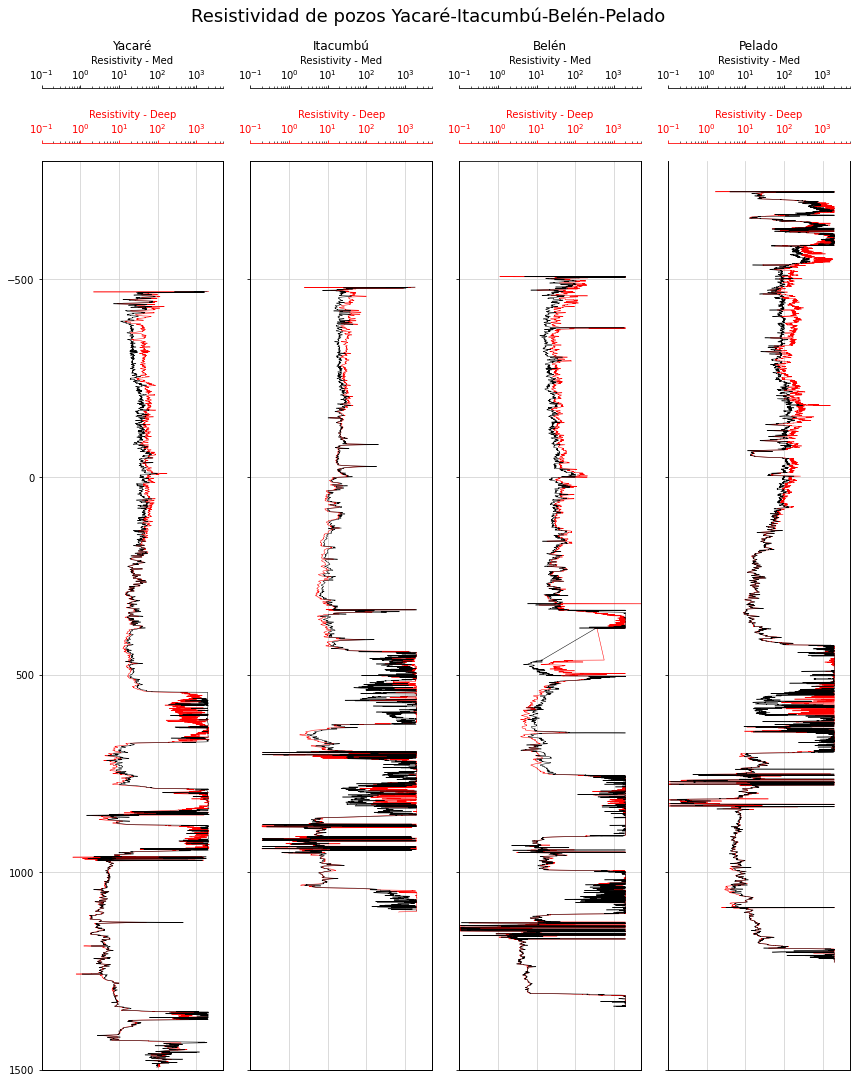

In [136]:
nombreComp = 'Resistividad de pozos Yacaré-Itacumbú-Belén-Pelado'
fig, ax = plt.subplots(figsize=(12,15))

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax5 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax7 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax2 = ax1.twiny()
ax4 = ax3.twiny()
ax6 = ax5.twiny()
ax8 = ax7.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)


# ---------------------------- POZO 1 -------------------------------
ax1.set_title('Yacaré')

# Resistivity track
ax1.plot(wellYacRes["ILD"], wellYacRes.index, color = "red", linewidth = 0.5)
ax1.set_xlabel("Resistivity - Deep")
ax1.set_xlim(0.1, 5000)
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")
ax1.set_xticks([0.1, 1, 10, 100, 1000])
ax1.semilogx()

# Resistivity track - Curve 2
ax2.plot(wellYacRes["ILM"], wellYacRes.index, color = "black", linewidth = 0.5)
ax2.set_xlabel("Resistivity - Med")
ax2.set_xlim(0.1, 5000)
ax2.xaxis.label.set_color("black")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.spines["top"].set_visible(True)
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.xaxis.set_ticks_position("top")
ax2.semilogx()



# ---------------------------- POZO 2 -------------------------------
ax3.set_title('Itacumbú')

# Resistivity track
ax3.plot(wellItaRes["ILD"], wellItaRes.index, color = "red", linewidth = 0.5)
ax3.set_xlabel("Resistivity - Deep")
ax3.set_xlim(0.1, 5000)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([0.1, 1, 10, 100, 1000])
ax3.semilogx()

# Resistivity track - Curve 2
ax4.plot(wellItaRes["ILM"], wellItaRes.index, color = "black", linewidth = 0.5)
ax4.set_xlabel("Resistivity - Med")
ax4.set_xlim(0.1, 5000)
ax4.xaxis.label.set_color("black")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_edgecolor("black")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.xaxis.set_ticks_position("top")
ax4.semilogx()



# ---------------------------- POZO 3 -------------------------------
ax5.set_title('Belén')

# Resistivity track
ax5.plot(wellBel["ILD"], wellBel.index, color = "red", linewidth = 0.5)
ax5.set_xlabel("Resistivity - Deep")
ax5.set_xlim(0.1, 5000)
ax5.xaxis.label.set_color("red")
ax5.tick_params(axis='x', colors="red")
ax5.spines["top"].set_edgecolor("red")
ax5.set_xticks([0.1, 1, 10, 100, 1000])
ax5.semilogx()

# Resistivity track - Curve 2
ax6.plot(wellBel["ILM"], wellBel.index, color = "black", linewidth = 0.5)
ax6.set_xlabel("Resistivity - Med")
ax6.set_xlim(0.1, 5000)
ax6.xaxis.label.set_color("black")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.set_xticks([0.1, 1, 10, 100, 1000])
ax6.xaxis.set_ticks_position("top")
ax6.semilogx()



# ---------------------------- POZO 4 -------------------------------
ax7.set_title('Pelado')

# Resistivity track
ax7.plot(wellPel["ILD"], wellPel.index, color = "red", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Deep")
ax7.set_xlim(0.1, 5000)
ax7.xaxis.label.set_color("red")
ax7.tick_params(axis='x', colors="red")
ax7.spines["top"].set_edgecolor("red")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()

# Resistivity track - Curve 2
ax8.plot(wellPel["ILM"], wellPel.index, color = "black", linewidth = 0.5)
ax8.set_xlabel("Resistivity - Med")
ax8.set_xlim(0.1, 5000)
ax8.xaxis.label.set_color("black")
ax8.spines["top"].set_position(("axes", 1.08))
ax8.spines["top"].set_visible(True)
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0.1, 1, 10, 100, 1000])
ax8.xaxis.set_ticks_position("top")
ax8.semilogx()



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax3, ax5, ax7]:
    ax.set_ylim(1500, -800)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    #for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        #ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    

for ax in [ax2, ax3, ax4, ax5, ax6, ax7]:
    plt.setp(ax.get_yticklabels(), visible = False)


fig.suptitle(nombreComp, y=1, ha='center', fontsize=18)
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
#plt.savefig(nombreComp + '_large' + ".jpg")
plt.savefig(nombreComp + ".jpg")
plt.show()

### Ploteo de Resistividad y GR para los cuatro pozos

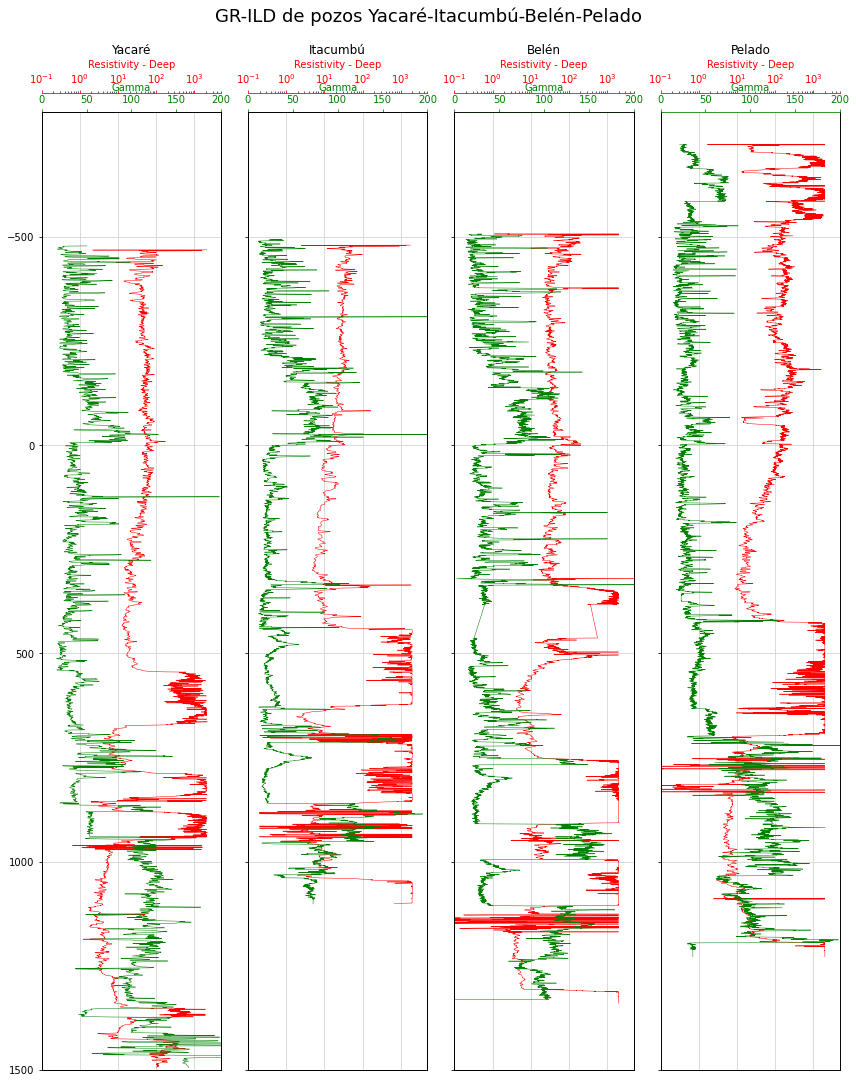

In [138]:
nombreComp = 'GR-ILD de pozos Yacaré-Itacumbú-Belén-Pelado'
fig, ax = plt.subplots(figsize=(12,15))

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax5 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax7 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax2 = ax1.twiny()
ax4 = ax3.twiny()
ax6 = ax5.twiny()
ax8 = ax7.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)


# ---------------------------- POZO 1 -------------------------------
ax1.set_title('Yacaré')

# Resistivity track
ax1.plot(wellYacRes["ILD"], wellYacRes.index, color = "red", linewidth = 0.5)
ax1.set_xlabel("Resistivity - Deep")
ax1.set_xlim(0.1, 5000)
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")
ax1.set_xticks([0.1, 1, 10, 100, 1000])
ax1.semilogx()

# Gamma Ray track
ax2.plot(wellYacSPGR["GR"], wellYacSPGR.index, color = "green", linewidth = 0.5)
ax2.set_xlabel("Gamma")
ax2.xaxis.label.set_color("green")
ax2.set_xlim(0, 200)
ax2.tick_params(axis='x', colors="green")
ax2.spines["top"].set_edgecolor("green")
ax2.title.set_color('green')
ax2.set_xticks([0, 50, 100, 150, 200])
ax2.xaxis.set_ticks_position("top")



# ---------------------------- POZO 2 -------------------------------
ax3.set_title('Itacumbú')

# Resistivity track
ax3.plot(wellItaRes["ILD"], wellItaRes.index, color = "red", linewidth = 0.5)
ax3.set_xlabel("Resistivity - Deep")
ax3.set_xlim(0.1, 5000)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([0.1, 1, 10, 100, 1000])
ax3.semilogx()

# Gamma Ray track
ax4.plot(wellItaSPGR["SGR"], wellItaSPGR.index, color = "green", linewidth = 0.5)
ax4.set_xlabel("Gamma")
ax4.xaxis.label.set_color("green")
ax4.set_xlim(0, 200)
ax4.tick_params(axis='x', colors="green")
ax4.spines["top"].set_edgecolor("green")
ax4.title.set_color('green')
ax4.set_xticks([0, 50, 100, 150, 200])
ax4.xaxis.set_ticks_position("top")



# ---------------------------- POZO 3 -------------------------------
ax5.set_title('Belén')

# Resistivity track
ax5.plot(wellBel["ILD"], wellBel.index, color = "red", linewidth = 0.5)
ax5.set_xlabel("Resistivity - Deep")
ax5.set_xlim(0.1, 5000)
ax5.xaxis.label.set_color("red")
ax5.tick_params(axis='x', colors="red")
ax5.spines["top"].set_edgecolor("red")
ax5.set_xticks([0.1, 1, 10, 100, 1000])
ax5.semilogx()

# Gamma Ray track
ax6.plot(wellBel["GR"], wellBel.index, color = "green", linewidth = 0.5)
ax6.set_xlabel("Gamma")
ax6.xaxis.label.set_color("green")
ax6.set_xlim(0, 200)
ax6.tick_params(axis='x', colors="green")
ax6.spines["top"].set_edgecolor("green")
ax6.title.set_color('green')
ax6.set_xticks([0, 50, 100, 150, 200])
ax6.xaxis.set_ticks_position("top")



# ---------------------------- POZO 4 -------------------------------
ax7.set_title('Pelado')

# Resistivity track
ax7.plot(wellPel["ILD"], wellPel.index, color = "red", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Deep")
ax7.set_xlim(0.1, 5000)
ax7.xaxis.label.set_color("red")
ax7.tick_params(axis='x', colors="red")
ax7.spines["top"].set_edgecolor("red")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()

# Gamma Ray track
ax8.plot(wellPel["GR"], wellPel.index, color = "green", linewidth = 0.5)
ax8.set_xlabel("Gamma")
ax8.xaxis.label.set_color("green")
ax8.set_xlim(0, 200)
ax8.tick_params(axis='x', colors="green")
ax8.spines["top"].set_edgecolor("green")
ax8.title.set_color('green')
ax8.set_xticks([0, 50, 100, 150, 200])
ax8.xaxis.set_ticks_position("top")



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax3, ax5, ax7]:
    ax.set_ylim(1500, -800)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    #for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        #ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    

for ax in [ax2, ax3, ax4, ax5, ax6, ax7]:
    plt.setp(ax.get_yticklabels(), visible = False)


fig.suptitle(nombreComp, y=1, ha='center', fontsize=18)
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
#plt.savefig(nombreComp + '_large' + ".jpg")
plt.savefig(nombreComp + ".jpg")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,15))

# Create a dictionary of formations with a top and bottom depth
formations = {"A":[470, 900], 
              "B": [900, 1370],
              "C": [1370, 1553],
              "D": [1553, 1668],
              "E": [1668, 1778]}

# Select the same number of colours as there are formations
zone_colours = ["red", "blue", "green", "orange", "purple"]




#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)
#ax6 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax4.twiny()
ax6 = ax2.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)


# Caliper track
ax1.plot(wellCali["CALI"], wellCali.index, color = "black", linewidth = 0.5)
ax1.set_xlabel("Caliper")
ax1.set_xlim(6, 16)
ax1.set_ylabel("Depth (m)")
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
#ax1.fill_betweenx(well_nan.index, 8.0, well["CALI"], facecolor='yellow')
ax1.set_xticks([6,  11, 16])


# Gamma Ray track
ax2.plot(wellSPGR["GR"], wellSPGR.index, color = "green", linewidth = 0.5)
ax2.set_xlabel("Gamma")
ax2.xaxis.label.set_color("green")
ax2.set_xlim(0, 200)
ax2.tick_params(axis='x', colors="green")
ax2.spines["top"].set_edgecolor("green")
ax2.title.set_color('green')
ax2.set_xticks([0, 50, 100, 150, 200])
#ax1.fill_betweenx(well_nan.index, well["GR"], 200, facecolor='yellow')

# Resistivity track
ax4.plot(wellRes["ILD"], wellRes.index, color = "red", linewidth = 0.5)
ax4.set_xlabel("Resistivity - Deep")
ax4.set_xlim(0.1, 5000)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.semilogx()

# Resistivity track - Curve 2
ax7.plot(wellRes["ILM"], wellRes.index, color = "black", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Med")
ax7.set_xlim(0.1, 5000)
ax7.xaxis.label.set_color("black")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_edgecolor("black")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()


# Spontaneous Potencial
ax6.plot(wellSPGR["SP"], wellSPGR.index, color = "purple", linewidth = 0.5)
ax6.set_xlabel("SP")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.set_xlim(-80, 60)
ax6.xaxis.label.set_color("purple")
ax6.tick_params(axis='x', colors="purple")
ax6.spines["top"].set_edgecolor("purple")
ax6.xaxis.set_ticks_position("top")
ax6.set_xticks([-80, 0, 60])



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax4]:
    ax.set_ylim(2400, 400)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    #for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        #ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    

for ax in [ax2, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)


fig.suptitle(tituloPozo, y=1, ha='center', fontsize=18)
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
#plt.savefig(nombrePozo + '_large' + ".jpg")
plt.savefig(nombrePozo + ".jpg")
plt.show()

Guardamos dataFrame como XLSX

In [ ]:
well.to_excel(nombrePozo + '.xlsx')